In [2]:
!pip install keras
!pip install sklearn
!pip install pandas
!pip install numpy
!pip install nltk
!pip install Word2Vec
!pip install tensorflow
!pip install matplotlib

You should consider upgrading via the 'C:\Python\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Python\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Python\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Python\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Python\python.exe -m pip install --upgrade pip' command.



  Using cached word2vec-0.11.1.tar.gz (42 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
Failed to build Word2Vec


  ERROR: Command errored out with exit status 1:
   command: 'C:\Python\python.exe' 'C:\Python\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' build_wheel 'C:\Users\RYZEN\AppData\Local\Temp\tmpatkexfw2'
       cwd: C:\Users\RYZEN\AppData\Local\Temp\pip-install-kx5wcsme\word2vec_b6d247ae4ca140f496d891d5986e1963
  Complete output (95 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\word2vec
  copying word2vec\io.py -> build\lib\word2vec
  copying word2vec\scripts_interface.py -> build\lib\word2vec
  copying word2vec\utils.py -> build\lib\word2vec
  copying word2vec\wordclusters.py -> build\lib\word2vec
  copying word2vec\wordvectors.py -> build\lib\word2vec
  copying word2vec\_generated_version.py -> build\lib\word2vec
  copying word2vec\__init__.py -> build\lib\word2vec
  creating build\lib\word2vec\tests
  copying word2vec\tests\test_core.py -> build\lib\word2vec\tests
  copying word2vec\tests\te

You should consider upgrading via the 'C:\Python\python.exe -m pip install --upgrade pip' command.


  Using cached matplotlib-3.5.2-cp39-cp39-win_amd64.whl (7.2 MB)
  Using cached fonttools-4.33.3-py3-none-any.whl (930 kB)
  Using cached Pillow-9.1.1-cp39-cp39-win_amd64.whl (3.3 MB)
  Using cached kiwisolver-1.4.2-cp39-cp39-win_amd64.whl (55 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


You should consider upgrading via the 'C:\Python\python.exe -m pip install --upgrade pip' command.


In [3]:
import codecs
import pandas as pd
import numpy as np
import nltk
from gensim.models import Word2Vec
from sklearn.preprocessing import StandardScaler
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
import csv
nltk.download('wordnet')
nltk.download('omw-1.4')
import sklearn
import pymorphy2
from keras import models
from keras import layers
from tensorflow import keras
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RYZEN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RYZEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RYZEN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\RYZEN\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
def csv_to_list(arr):
    arr_list = []
    for row in arr:
        arr_list.append(list_to_str(row))
    return arr_list
def list_to_str(arr):
    str_ = ''
    for rec in arr:
        str_+=rec
    return str_

In [5]:
d = csv_to_list(csv.reader(codecs.open('postel_tekstil.csv')))
dd=csv_to_list(csv.reader(codecs.open('hoz_posuda.csv')))
hb=csv_to_list(csv.reader(codecs.open('hoz_ban.csv')))
hh=csv_to_list(csv.reader(codecs.open('hoz_himiya.csv')))
mg=csv_to_list(csv.reader(codecs.open('mebel_garderob.csv')))
mm=csv_to_list(csv.reader(codecs.open('mebel_myagkaya.csv')))
ms=csv_to_list(csv.reader(codecs.open('mebel_stol.csv')))
ps=csv_to_list(csv.reader(codecs.open('postel_shtory.csv')))


dfd = pd.DataFrame(d,columns=['title'])
dfd['type']=0
dff = pd.DataFrame(dd,columns=['title'])
dff['type']=1
dfhb = pd.DataFrame(hb,columns=['title'])
dfhb['type']=2
dfhh = pd.DataFrame(hh,columns=['title'])
dfhh['type']=3
dfmg = pd.DataFrame(mg,columns=['title'])
dfmg['type']=4
dfmm = pd.DataFrame(mm,columns=['title'])
dfmm['type']=5
dfms = pd.DataFrame(ms,columns=['title'])
dfms['type']=6
dfps = pd.DataFrame(ps,columns=['title'])
dfps['type']=7
df = pd.concat((dfd, dff, dfms,dfps,dfmm, dfmg, dfhh, dfhb),axis = 0).sample(frac = 1.0) # объединяем и перемешиваем
df.index = range(0,len(df))
print(df)

                                                  title  type
0                  Продам набор из 6-ти стульев. Москва     6
1     Купить домашний текстиль в интернет-магазине п...     0
2                 Колбасный шприц Kamille Vanessa Hakka     1
3     Продаю одноразовые вилки и ложки серии Фазенда...     1
4                       Диван - кровать асти вариант №1     5
...                                                 ...   ...
4421               Зимен Дизайнерский Стул Outlet Mebel     6
4422              Диван в классическом стиле Честерфилд     5
4423                   Столы и скамьи для бани из осины     6
4424  Интернет-магазин осуществляющих on-line продаж...     2
4425                Лого Стол из Искусственного ротанга     6

[4426 rows x 2 columns]


In [8]:
def df_preprocess(text):
    reg = re.compile('[^а-яА-Яa-zA-Z0-9 ]')
    #text = text.lower().replace("ё", "е")
    #text = text.replace("ъ", "ь")
    #text = text.replace("й", "и")

    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text)
    text = re.sub('@[^\s]+', '', text)
    text = re.sub(r'[\*+\#+\№\"\-+\+\=+\?+\&\^\.+\;\,+\>+\(\)\/+\:\\+\!\-\«\»\—]', '',text)
    # заменяем числа и цифры на ''
    text = re.sub(r'(\d+\s\d+)|(\d+)', '', text)
    # удаляем лишние пробелы
    text = re.sub(r'\s+', ' ', text)
    text = reg.sub(' ', text)
    text=re.sub(r'[a-z]', '', text)
    text = re.sub(r'\b\w{1,2}\b', '', text)
   

    # Лемматизация
    morph = pymorphy2.MorphAnalyzer()
    #text =[morph.parse(word)[0].normal_form for word in text.split()]
    st = ['москва', 'себестоимость', 'мск', 'краснодар', 'петербург', 'томск', 'казань', 'производитель', 'русский',
          'шт', 'интернетмагазин', 'мл', 'работа', 'заказ', 'размер', 'ссср', 'недорого', 'магазин', 'продаваться',
          'любой', 'доставка', 'цвет', 'продажа', 'оптом', 'новый', 'тц', 'продавать', 'цена', 'продать', 'омск', 'в',
          'владивосток', 'спб', 'нный', 'тот', 'р', 'тся', 'купить', 'город', 'ооо', 'от', 'руб', 'качество',
          'качественный', 'отдать', 'мм', 'предлагать', 'оптовый', 'иваново', 'россия', 'красивый', 'др', 'пр', 'без',
          'кг', 'всё', 'сп', 'с', 'нп', 'б', 'два', 'новосибирск', 'новгород', 'екатеринбург', 'самара', 'санкт',
          'санктпетербург', 'бу', 'м', 'г', 'год', 'опт']
    text = ' '.join([morph.parse(word)[0].normal_form for word in text.split() if word not in stopWords])
    text=' '.join([word for word in text.split() if word not in st])
    return text

In [9]:
stopWords = set(stopwords.words('russian'))
df['title'] = df['title'].apply(df_preprocess)
df.to_csv('df.csv')


In [11]:
df_clean = pd.read_csv('df.csv')

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
df_clean['title'] = df_clean['title'].astype('str')
df_clean["title"] = df_clean["title"].apply(tokenizer.tokenize)

df=df_clean
df.dropna(axis=0, how='any')
print(df['title'])

0                                           [набор, стул]
1       [домашний, текстиль, постельный, бельё, серный...
2                                      [колбасный, шприц]
3             [одноразовый, вилка, ложка, серия, фазенда]
4                       [диван, кровать, астить, вариант]
                              ...                        
4421                           [зимя, дизайнерский, стул]
4422             [диван, классический, стиль, честерфилд]
4423                          [стол, скамья, баня, осина]
4424          [осуществлять, товар, сауна, баня, красный]
4425                  [лого, стол, искусственный, ротанг]
Name: title, Length: 4426, dtype: object


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(df['title'], df['type'], test_size=0.1,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2,random_state=42)
X_train

2274    [жалюзи, рулонный, штора, моторизация, рольста...
1756    [торговля, бытовой, химия, хозтовары, сад, ого...
2411               [древесный, стол, сделать, свой, рука]
1263               [жалюзи, горизонтальный, вертикальный]
1241            [сумка, ножевой, нож, коллекционирование]
                              ...                        
2015    [жалюзи, рольштора, видный, рулонный, штора, в...
1244                                   [максвелл, кресло]
3372                    [перчатка, таблетка, посудомойка]
1365                                        [рольставень]
3579    [родентицидный, средство, грызун, абсолёный, т...
Name: title, Length: 3186, dtype: object

In [13]:
w2v_model = Word2Vec(
    min_count=5,
    window=2,
    vector_size=450,
    negative=10,
    alpha=0.03,
    min_alpha=0.0007,
    sample=6e-5,
    sg=1)
df['title'] = df['title'].tolist()
#df_clean['title'] = df_clean['title'].str.split()
w2v_model.build_vocab(df['title'])
w2v_model.train(df['title'], total_examples=w2v_model.corpus_count, epochs=30)

print(w2v_model.wv)
print(w2v_model.wv.index_to_key)

w2v_model.save('word2vec.model')

KeyedVectors<vector_size=450, 696 keys>
['штора', 'постельный', 'бельё', 'баня', 'жалюзи', 'диван', 'веник', 'стол', 'шкаф', 'мебель', 'средство', 'банный', 'стул', 'рулонный', 'февраль', 'комфорт', 'комплект', 'кресло', 'стенка', 'мягкий', 'дуб', 'сауна', 'текстиль', 'дом', 'пошив', 'состояние', 'гостиная', 'набор', 'массив', 'очистка', 'посуда', 'дубовый', 'сатина', 'прихожая', 'хороший', 'чан', 'угловой', 'карниз', 'чугунный', 'деревянный', 'отличный', 'журнальный', 'тканевый', 'полка', 'производство', 'диванкровать', 'химия', 'розница', 'тип', 'покрывало', 'окно', 'изготовление', 'столик', 'берёзовый', 'бель', 'вертикальный', 'ваш', 'комод', 'вода', 'бязь', 'дерево', 'таракан', 'бытовой', 'бактерия', 'ручной', 'низкий', 'вид', 'камень', 'стиль', 'ткань', 'клоп', 'обеденный', 'пластиковый', 'одежда', 'натуральный', 'белый', 'гардеробный', 'моющий', 'стеклянный', 'богатырь', 'литр', 'горизонтальный', 'кровать', 'дизайн', 'гостиница', 'дезинфицировать', 'прямой', 'подарок', 'наличие',

In [15]:
!pip install tqdm
from tqdm import tqdm


You should consider upgrading via the 'C:\Python\python.exe -m pip install --upgrade pip' command.


In [16]:

#X_train vector
listof_sent_vec = []
# tqdm is for improving speed and making progressbar
for sent in tqdm(X_train):
    sent_vec = np.zeros(450)
    cnt_words = 0;
    for word in sent:
        if word in w2v_model.wv.index_to_key:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    listof_sent_vec.append(sent_vec)

Label = y_train
list_col = tuple(range(450))
Scaler = StandardScaler()
train_vec = Scaler.fit_transform(listof_sent_vec)
W2v_data_train = pd.DataFrame(data=train_vec, columns=list_col)
W2v_data_train["type"] = Label
W2v_data_train.to_csv('W2v_data_train.csv')

100%|███████████████████████████████████████████████████████████████████████████| 3186/3186 [00:00<00:00, 24134.89it/s]


In [17]:
#X_valid vector
listof_sent_vec = []
for sent in tqdm(X_valid):
    sent_vec = np.zeros(450)
    cnt_words = 0;
    for word in sent:
        if word in w2v_model.wv.index_to_key:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    listof_sent_vec.append(sent_vec)

Label = y_valid
list_col = tuple(range(450))
cv_vec = Scaler.transform(listof_sent_vec)
W2v_data_cv = pd.DataFrame(data=cv_vec, columns=list_col)
W2v_data_cv["type"] = Label
W2v_data_cv.to_csv('W2v_data_cv.csv')

100%|█████████████████████████████████████████████████████████████████████████████| 443/443 [00:00<00:00, 23313.38it/s]


In [18]:
#X_test vector
listof_sent_vec = []

for sent in tqdm(X_test):
    sent_vec = np.zeros(450)
    cnt_words = 0;
    for word in sent:
        if word in w2v_model.wv.index_to_key:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    listof_sent_vec.append(sent_vec)

Label = y_test
list_col = tuple(range(450))
test_vec = Scaler.transform(listof_sent_vec)
W2v_data_test = pd.DataFrame(data=test_vec, columns=list_col)
W2v_data_test["type"] = Label
W2v_data_test.to_csv('W2v_data_test.csv')

100%|█████████████████████████████████████████████████████████████████████████████| 797/797 [00:00<00:00, 24906.20it/s]


In [23]:
from keras.utils.np_utils import to_categorical

nb_classes=8
train_labels =to_categorical(y_train, nb_classes)
test_labels = to_categorical(y_test,nb_classes)
valid_labels=to_categorical(y_valid,nb_classes)

X_train = W2v_data_train.drop("type",axis=1).to_numpy()
X_valid = W2v_data_cv.drop("type",axis=1).to_numpy()
X_test = W2v_data_test.drop("type",axis=1).to_numpy()

train_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [32]:
#Нейронная сеть

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(450,)))
model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(8, activation='softmax')) # кол-во нейронов в выходном слое = кол-ву классов
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               57728     
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 75,272
Trainable params: 75,272
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/20
7/7 [==============================] - 1s 33ms/step - loss: 2.2772 - accuracy: 0.1940 - val_loss: 1.9449 - val_accuracy: 0.3431
Epoch 2/20
7/7 [==============================] - 0s 8ms/step - loss: 1.8777 - accuracy: 0.3597 - val_loss: 1.8162 - val_accuracy: 0.4424
Epoch 3/20
7/7 [==============================] - 0s 8ms/step - loss: 1.7117 - accuracy: 0.4868 - val_loss: 1.6771 - val_accuracy: 0.4966
Epoch 4/20
7/7 [==============================] - 0s 8ms/step - loss: 1.5227 - accuracy: 0.5587 - val_loss: 1.6276 - val_accuracy: 0.4424
Epoch 5/20
7/7 [==============================] - 0s 8ms/step - loss: 1.5475 - accuracy: 0.5273 - val_loss: 1.3945 - val_accuracy: 0.5982
Epoch 6/20
7/7 [==============================] - 0s 9ms/step - loss: 1.2856 - accuracy: 0.6453 - val_loss: 1.3059 - val_accuracy: 0.6433
Epoch 7/20
7/7 [==============================] - 0s 8ms/step - loss: 1.2668 - accuracy: 0.6431 - val_loss: 1.1859 - val_accuracy: 0.6366
Epoch 8/20
7/7 [=================

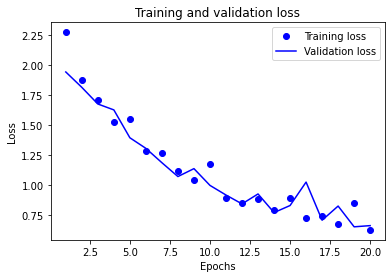

0.6497697830200195


In [33]:
model.compile(optimizer='rmsprop',
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(X_train,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_valid, valid_labels))



loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
print(min(history.history['val_loss']))

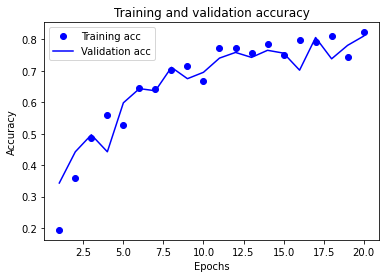

In [34]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [35]:
results = model.evaluate(X_test, test_labels)
print(results)

#predictions = model.predict(X_test)
#print(np.argmax(predictions[4]))
#print(np.argmax(predictions[837]))
#print(np.argmax(predictions[838]))

model.save('nnmodel.h5')

25/25 [==============================] - 0s 1ms/step - loss: 0.7047 - accuracy: 0.8156
[0.7046707272529602, 0.8155583143234253]


In [37]:
#Проверка модели
print('Введите текст объявления')
a=input()
a=df_preprocess(a)

a=tokenizer.tokenize(a)


listof_sent_vec = []

for word in tqdm(a):
    sent_vec = np.zeros(450)
    cnt_words = 0;

    if word in w2v_model.wv.index_to_key:
        vec = w2v_model.wv[word]
        sent_vec += vec
        cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    listof_sent_vec.append(sent_vec)

Label = y_test
list_col = tuple(range(450))
test_vec = Scaler.transform(listof_sent_vec)
W2v_data= pd.DataFrame(data=test_vec, columns=list_col)

aa=W2v_data.to_numpy()
#print(aa)

pr=model.predict(aa)
cl=np.argmax(pr[0])
if cl == 0:
    print('Постельное бельё, текстиль')
elif cl == 1:
    print('Посуда, кухонные принадлежности')
elif cl == 2:
    print('Банные принадлежности')
elif cl == 3:
    print('Бытовая химия')
elif cl == 4:
    print('Гардеробы, стенки, шкафы')
elif cl == 5:
    print('Мягкая мебель')
elif cl == 6:
    print('Столы и стулья')
elif cl == 7:
    print('Шторы, жалюзи, карнизы')

Введите текст объявления
Стол журнальный со стеклом


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]

1/1 [==============================] - 0s 18ms/step
Столы и стулья
